# Project: Constructing investment portfolios using enterprise historical ESG data

## Analysis Approach

a. Calculate the cumulative annual return of each stock (cumulate from June in t to May in t+1, 12 months buy and hold return)

b. Within the assigned industry, sort these stocks based on their combination score of the growth style score and the ranked ESG adjusted score for each year

c. Construct a portfolio based on combination score for each year (Long top 10 stocks with high combination score, and assign each selected stock weight based on its market capitalization) which will generate 10 portfolios 

d. Calculate the average portfolio returns, return standard deviation, sharp ratio and t-statistics, and ESG performance of above 10 portfolios. 

bonus: try different weight assignment to ESG ranked score and ranked style score to calculated the combination score

`EEE_Group6.csv`The meaning of each column is as follows:
- Firm_Unique_identifier：Unique ID number of each firms
- Date	：Date of the records
- Firm_name：Companys' name, some company may changed their name during this time
- retrun：Monthly return of the company stock (Spelling errors)
- value-weighted_market_return：Monthly market return, all the same in each period
- market_capitalization：Companys' market capitalization
- year：Date of year of data
- yearmonth：Year and month
- risk-free_rate：Monthly risk-free rate, all the same in each period
- P/E：Companys' annually P/E ratio
- Sales Growth：Companys' annually Sales Growth rate
- Adjusted_ESG_Score: Companys' annually adjusted_ESG_Score

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eee = pd.read_csv("./EEE_Group6.csv")
eee.head(10)

,Firm_Unique_identifier,Date,Firm_name,retrun,value-weighted_market_return,market_capitalization,year,yearmonth,risk-free_rate,P/E,Sales Growth,Adjusted_ESG_Score
0,10032,2017/1/31,PLEXUS CORP,0.004811,0.022177,1829.421274,2017,201701,0.001536,0.048953,-0.037029,-0.129765
1,10032,2017/2/28,PLEXUS CORP,0.032597,0.032632,1889.054360,2017,201702,0.000055,0.048953,-0.037029,-0.129765
2,10032,2017/3/31,PLEXUS CORP,0.030854,0.002095,1949.882974,2017,201703,0.000026,0.048953,-0.037029,-0.129765
3,10032,2017/4/28,PLEXUS CORP,-0.100519,0.009628,1753.882707,2017,201704,0.000494,0.048953,-0.037029,-0.129765
4,10032,2017/5/31,PLEXUS CORP,-0.000192,0.009303,1752.609645,2017,201705,0.000730,0.048953,-0.037029,-0.129765
5,10032,2017/6/30,PLEXUS CORP,0.011351,0.009551,1765.458300,2017,201706,0.000320,0.048953,-0.037029,-0.129765
6,10032,2017/7/31,PLEXUS CORP,0.019783,0.020309,1800.384650,2017,201707,0.001660,0.048953,-0.037029,-0.129765
7,10032,2017/8/31,PLEXUS CORP,-0.028539,0.001575,1749.940142,2017,201708,0.001338,0.048953,-0.037029,-0.129765
8,10032,2017/9/29,PLEXUS CORP,0.076805,0.023777,1876.661181,2017,201709,-0.000121,0.048953,-0.037029,-0.129765
9,10032,2017/10/31,PLEXUS CORP,0.095399,0.019277,2055.693530,2017,201710,0.000230,0.048953,-0.037029,-0.129765


In [3]:
cleaned_eee = eee.copy() # create a DataFrame to clean the data

In [4]:
cleaned_eee.sample(10)

,Firm_Unique_identifier,Date,Firm_name,retrun,value-weighted_market_return,market_capitalization,year,yearmonth,risk-free_rate,P/E,Sales Growth,Adjusted_ESG_Score
5979,80341,2017/10/31,MOTORCAR PARTS OF AMERICA INC,-0.018669,0.019277,551.111327,2017,201710,0.000230,0.065734,0.141700,-0.260826
10649,92469,2010/10/29,ECHOSTAR CORPORATION,0.111111,0.038606,795.021229,2010,201010,0.000304,0.211023,-0.114838,-0.510947
5321,79094,2013/7/31,JABIL CIRCUIT INC,0.128067,0.052690,4659.084384,2013,201307,0.000688,0.083845,0.038327,0.070580
5180,78987,2012/10/31,MICROCHIP TECHNOLOGY INC,-0.042743,-0.014064,6099.037280,2012,201210,0.000080,0.047312,-0.069949,0.324004
4210,76076,2010/8/31,CISCO SYSTEMS INC,-0.133723,-0.042887,111621.584400,2010,201008,0.001025,0.047706,-0.086571,-0.255294
9620,90550,2011/1/31,DOLBY LABORATORIES INC,-0.104947,0.019190,3185.293541,2011,201101,0.001078,0.044006,0.282431,-0.250900
3790,61241,2018/7/31,ADVANCED MICRO DEVICES INC,0.222815,0.031603,17869.403690,2018,201807,0.001438,0.003891,0.247425,0.471191
2046,32942,2017/1/31,HUBBELL INC,0.046101,0.022177,6757.982661,2017,201701,0.001536,0.045073,0.033860,0.359341
6354,82261,2017/6/30,NOVANTA INC,0.058824,0.009551,1244.880000,2017,201706,0.000320,0.030000,0.029872,-0.087875
2785,50948,2018/9/28,SEMTECH CORP,-0.069456,0.000432,3681.943099,2018,201809,0.000401,0.015363,0.080061,0.033696


In [5]:
cleaned_eee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11108 entries, 0 to 11107
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Firm_Unique_identifier        11108 non-null  int64  
 1   Date                          11108 non-null  object 
 2   Firm_name                     11108 non-null  object 
 3   retrun                        11108 non-null  float64
 4   value-weighted_market_return  11108 non-null  float64
 5   market_capitalization         11108 non-null  float64
 6   year                          11108 non-null  int64  
 7   yearmonth                     11108 non-null  int64  
 8   risk-free_rate                11108 non-null  float64
 9   P/E                           11108 non-null  float64
 10  Sales Growth                  11108 non-null  float64
 11  Adjusted_ESG_Score            11108 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 1.0+ MB


It is better to change "FirmUnique identifier" into a category variable.

In [6]:
cleaned_eee.columns

Index(['Firm_Unique_identifier', 'Date', 'Firm_name', 'retrun',
       'value-weighted_market_return', 'market_capitalization', 'year',
       'yearmonth', 'risk-free_rate', 'P/E', 'Sales Growth',
       'Adjusted_ESG_Score'],
      dtype='object')

In [7]:
cleaned_eee["Firm_Unique_identifier"].value_counts()

79879    132
84827    132
60871    132
88360    132
86745    132
        ... 
17949     12
18013     12
12629     12
50906     11
17046      8
Name: Firm_Unique_identifier, Length: 168, dtype: int64

In [8]:
cleaned_eee["Firm_name"].value_counts()

DOLBY LABORATORIES INC        132
HUBBELL INC                   132
ADVANCED MICRO DEVICES INC    132
SUNPOWER CORP                 132
SILICON LABORATORIES INC      132
                             ... 
AQUANTIA CORP                   8
XPERI HOLDING CORP              7
D Z S INC                       5
TESSERA HOLDING CORP            1
SONUS NETWORKS INC NEW          1
Name: Firm_name, Length: 183, dtype: int64

Value counts of "Firm_name" is more than which of "Firm_Unique_identifier". It means some company might change their name.

So it is better to use "Firm_Unique_identifier" to recognize each company.

In [9]:
cleaned_eee["Firm_Unique_identifier"] = cleaned_eee["Firm_Unique_identifier"].astype('category')
cleaned_eee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11108 entries, 0 to 11107
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Firm_Unique_identifier        11108 non-null  category
 1   Date                          11108 non-null  object  
 2   Firm_name                     11108 non-null  object  
 3   retrun                        11108 non-null  float64 
 4   value-weighted_market_return  11108 non-null  float64 
 5   market_capitalization         11108 non-null  float64 
 6   year                          11108 non-null  int64   
 7   yearmonth                     11108 non-null  int64   
 8   risk-free_rate                11108 non-null  float64 
 9   P/E                           11108 non-null  float64 
 10  Sales Growth                  11108 non-null  float64 
 11  Adjusted_ESG_Score            11108 non-null  float64 
dtypes: category(1), float64(7), int64(2), object(2

In [10]:
cleaned_eee["Firm_Unique_identifier"].value_counts()

86115    132
88360    132
59328    132
15579    132
89462    132
        ... 
85231     12
88526     12
87053     12
50906     11
17046      8
Name: Firm_Unique_identifier, Length: 168, dtype: int64

In [11]:
# insert some columns that we may need
cleaned_eee['return_factor'] = cleaned_eee['retrun'] + 1
cleaned_eee['rm_factor'] = cleaned_eee['value-weighted_market_return'] + 1

cleaned_eee['combination_score'] = (cleaned_eee['Adjusted_ESG_Score'] + cleaned_eee['Sales Growth']) / 2
# Notice! We just need to change the weight of them so that we can get the answer of bonus question

cleaned_eee['month'] = cleaned_eee['yearmonth'] - (cleaned_eee['year'] * 100)
cleaned_eee['portfolio_year'] = cleaned_eee.apply(lambda row: row['year'] - 1 if row['month'] < 6 else row['year'], axis=1)

cleaned_eee.sample(20)

,Firm_Unique_identifier,Date,Firm_name,retrun,value-weighted_market_return,market_capitalization,year,yearmonth,risk-free_rate,P/E,Sales Growth,Adjusted_ESG_Score,return_factor,rm_factor,combination_score,month,portfolio_year
2558,45306,2018/9/28,INTERDIGITAL INC,-0.031477,0.000432,2755.360000,2018,201809,0.000401,0.066185,-0.199617,-0.265620,0.968523,1.000432,-0.232619,9,2018
1180,15579,2013/7/31,TEXAS INSTRUMENTS INC,0.132281,0.052690,43143.958480,2013,201307,0.000688,0.049531,-0.073520,0.251311,1.132281,1.052690,0.088896,7,2013
1205,15579,2015/8/31,TEXAS INSTRUMENTS INC,-0.042817,-0.059979,49102.306400,2015,201508,0.000064,0.048630,0.068824,0.272467,0.957183,0.940021,0.170646,8,2015
5843,80329,2010/6/30,FLEXTRONICS INTERNATIONAL LTD,-0.146341,-0.050802,4561.888722,2010,201006,0.001116,0.002551,-0.220942,-0.009381,0.853659,0.949198,-0.115161,6,2010
1354,16163,2019/1/31,F G L HOLDINGS,0.187688,0.088295,1752.547476,2019,201901,0.003047,-0.010511,-0.585906,-0.621259,1.187688,1.088295,-0.603582,1,2018
8802,88360,2014/10/31,MARVELL TECHNOLOGY GROUP LTD,-0.002967,0.021172,6869.183786,2014,201410,0.000190,0.042867,0.074408,-0.104281,0.997033,1.021172,-0.014937,10,2014
3621,60871,2015/6/30,ANALOG DEVICES INC,-0.055547,-0.019272,20124.692500,2015,201506,-0.000054,0.040508,0.087742,0.300977,0.944453,0.980728,0.194360,6,2015
2133,37568,2016/4/29,FRANKLIN ELECTRIC INC,-0.018029,0.011737,1458.383947,2016,201604,0.000666,0.056234,-0.117252,-0.387122,0.981971,1.011737,-0.252187,4,2015
1718,25419,2016/9/30,WHIRLPOOL CORP,-0.092253,0.003020,12233.999320,2016,201609,0.000587,0.067747,0.051278,0.351924,0.907747,1.003020,0.201601,9,2016
2422,44506,2014/5/30,INTEGRATED DEVICE TECHNOLOGY,0.139674,0.020260,1985.610228,2014,201405,-0.000006,0.061325,-0.005043,0.199330,1.139674,1.020260,0.097144,5,2013


In [12]:
cleaned_eee['portfolio_year_return'] = cleaned_eee.groupby(['Firm_Unique_identifier', 'portfolio_year'])['return_factor'].transform(np.prod)
cleaned_eee.head(20)

,Firm_Unique_identifier,Date,Firm_name,retrun,value-weighted_market_return,market_capitalization,year,yearmonth,risk-free_rate,P/E,Sales Growth,Adjusted_ESG_Score,return_factor,rm_factor,combination_score,month,portfolio_year,portfolio_year_return
0,10032,2017/1/31,PLEXUS CORP,0.004811,0.022177,1829.421274,2017,201701,0.001536,0.048953,-0.037029,-0.129765,1.004811,1.022177,-0.083397,1,2016,0.961880
1,10032,2017/2/28,PLEXUS CORP,0.032597,0.032632,1889.054360,2017,201702,0.000055,0.048953,-0.037029,-0.129765,1.032597,1.032632,-0.083397,2,2016,0.961880
2,10032,2017/3/31,PLEXUS CORP,0.030854,0.002095,1949.882974,2017,201703,0.000026,0.048953,-0.037029,-0.129765,1.030854,1.002095,-0.083397,3,2016,0.961880
3,10032,2017/4/28,PLEXUS CORP,-0.100519,0.009628,1753.882707,2017,201704,0.000494,0.048953,-0.037029,-0.129765,0.899481,1.009628,-0.083397,4,2016,0.961880
4,10032,2017/5/31,PLEXUS CORP,-0.000192,0.009303,1752.609645,2017,201705,0.000730,0.048953,-0.037029,-0.129765,0.999808,1.009303,-0.083397,5,2016,0.961880
5,10032,2017/6/30,PLEXUS CORP,0.011351,0.009551,1765.458300,2017,201706,0.000320,0.048953,-0.037029,-0.129765,1.011351,1.009551,-0.083397,6,2017,1.118700
6,10032,2017/7/31,PLEXUS CORP,0.019783,0.020309,1800.384650,2017,201707,0.001660,0.048953,-0.037029,-0.129765,1.019783,1.020309,-0.083397,7,2017,1.118700
7,10032,2017/8/31,PLEXUS CORP,-0.028539,0.001575,1749.940142,2017,201708,0.001338,0.048953,-0.037029,-0.129765,0.971461,1.001575,-0.083397,8,2017,1.118700
8,10032,2017/9/29,PLEXUS CORP,0.076805,0.023777,1876.661181,2017,201709,-0.000121,0.048953,-0.037029,-0.129765,1.076805,1.023777,-0.083397,9,2017,1.118700
9,10032,2017/10/31,PLEXUS CORP,0.095399,0.019277,2055.693530,2017,201710,0.000230,0.048953,-0.037029,-0.129765,1.095399,1.019277,-0.083397,10,2017,1.118700


In [13]:
cleaned_eee['portfolio_year_return'] = cleaned_eee.groupby(['Firm_Unique_identifier', 'portfolio_year'])['return_factor'].transform(np.prod)

group_sizes = cleaned_eee.groupby(['Firm_Unique_identifier', 'portfolio_year']).size()
small_groups = group_sizes[group_sizes < 12].index
# Create a MultiIndex that includes Firm_Unique_identifier and portfolio year from cleaned_eee
cleaned_eee_index = cleaned_eee.set_index(['Firm_Unique_identifier', 'portfolio_year']).index

# Check if cleaned_eee_index is in small_groups. 
# If it is not, change 'portfolio year return' to a null value as it will not be available for investment in that year.
cleaned_eee.loc[cleaned_eee_index.isin(small_groups), 'portfolio_year_return'] = None

cleaned_eee.head(30)

,Firm_Unique_identifier,Date,Firm_name,retrun,value-weighted_market_return,market_capitalization,year,yearmonth,risk-free_rate,P/E,Sales Growth,Adjusted_ESG_Score,return_factor,rm_factor,combination_score,month,portfolio_year,portfolio_year_return
0,10032,2017/1/31,PLEXUS CORP,0.004811,0.022177,1829.421274,2017,201701,0.001536,0.048953,-0.037029,-0.129765,1.004811,1.022177,-0.083397,1,2016,NaN
1,10032,2017/2/28,PLEXUS CORP,0.032597,0.032632,1889.054360,2017,201702,0.000055,0.048953,-0.037029,-0.129765,1.032597,1.032632,-0.083397,2,2016,NaN
2,10032,2017/3/31,PLEXUS CORP,0.030854,0.002095,1949.882974,2017,201703,0.000026,0.048953,-0.037029,-0.129765,1.030854,1.002095,-0.083397,3,2016,NaN
3,10032,2017/4/28,PLEXUS CORP,-0.100519,0.009628,1753.882707,2017,201704,0.000494,0.048953,-0.037029,-0.129765,0.899481,1.009628,-0.083397,4,2016,NaN
4,10032,2017/5/31,PLEXUS CORP,-0.000192,0.009303,1752.609645,2017,201705,0.000730,0.048953,-0.037029,-0.129765,0.999808,1.009303,-0.083397,5,2016,NaN
5,10032,2017/6/30,PLEXUS CORP,0.011351,0.009551,1765.458300,2017,201706,0.000320,0.048953,-0.037029,-0.129765,1.011351,1.009551,-0.083397,6,2017,1.118700
6,10032,2017/7/31,PLEXUS CORP,0.019783,0.020309,1800.384650,2017,201707,0.001660,0.048953,-0.037029,-0.129765,1.019783,1.020309,-0.083397,7,2017,1.118700
7,10032,2017/8/31,PLEXUS CORP,-0.028539,0.001575,1749.940142,2017,201708,0.001338,0.048953,-0.037029,-0.129765,0.971461,1.001575,-0.083397,8,2017,1.118700
8,10032,2017/9/29,PLEXUS CORP,0.076805,0.023777,1876.661181,2017,201709,-0.000121,0.048953,-0.037029,-0.129765,1.076805,1.023777,-0.083397,9,2017,1.118700
9,10032,2017/10/31,PLEXUS CORP,0.095399,0.019277,2055.693530,2017,201710,0.000230,0.048953,-0.037029,-0.129765,1.095399,1.019277,-0.083397,10,2017,1.118700


In [14]:
analysis_eee = cleaned_eee[[
    'Firm_Unique_identifier', 
    'market_capitalization', 
    'year', 
    'month', 
    'combination_score',
    'portfolio_year', 
    'portfolio_year_return'
]].copy()

analysis_eee.head(10)

,Firm_Unique_identifier,market_capitalization,year,month,combination_score,portfolio_year,portfolio_year_return
0,10032,1829.421274,2017,1,-0.083397,2016,NaN
1,10032,1889.054360,2017,2,-0.083397,2016,NaN
2,10032,1949.882974,2017,3,-0.083397,2016,NaN
3,10032,1753.882707,2017,4,-0.083397,2016,NaN
4,10032,1752.609645,2017,5,-0.083397,2016,NaN
5,10032,1765.458300,2017,6,-0.083397,2017,1.1187
6,10032,1800.384650,2017,7,-0.083397,2017,1.1187
7,10032,1749.940142,2017,8,-0.083397,2017,1.1187
8,10032,1876.661181,2017,9,-0.083397,2017,1.1187
9,10032,2055.693530,2017,10,-0.083397,2017,1.1187


In [15]:
# Step 1: Filter out data with month 6 and non null in portfolio_year_return
filtered_data = analysis_eee[(analysis_eee['month'] == 6) & (~pd.isnull(analysis_eee['portfolio_year_return']))]

# Step 2: Group and sort the filtered data according to 'year' and 'combination_score'
# We need to first group by portfolio year and then sort in descending order by combination_score 
sorted_data = filtered_data.sort_values(by=['portfolio_year', 'combination_score'], ascending=[True, False])  
  
# Step 3: For each year, only take the first ten rows
# Using groupby and head methods
rank_data = sorted_data.groupby('portfolio_year').head(10)  
  
portfolio_list = rank_data[[
    'Firm_Unique_identifier', 
    'portfolio_year',
    'market_capitalization', 
    'combination_score', 
    'portfolio_year_return'
]]  
  
portfolio_list 

,Firm_Unique_identifier,portfolio_year,market_capitalization,combination_score,portfolio_year_return
10093,91611,2010,9737.701337,0.224184,1.105821
4340,76201,2010,6917.653143,0.198197,1.492657
2818,51377,2010,3204.314529,0.162579,1.795334
9745,90978,2010,670.594121,0.141945,1.591837
7718,86580,2010,5842.162022,0.131879,1.525114
...,...,...,...,...,...
7826,86580,2019,100016.067400,0.296208,2.626843
5015,77918,2019,4561.978264,0.278807,1.007269
3669,60871,2019,41734.925090,0.275154,1.193322
930,14297,2019,10385.730590,0.271649,1.038334


In [16]:
# Firstly, we need to calculate the total sum of market_capitalization for each portfolio year
capitalization_sums = portfolio_list.groupby('portfolio_year')['market_capitalization'].sum().reset_index()  
  
# Turn it back to the original dataframe
portfolio_list = portfolio_list.merge(capitalization_sums, on='portfolio_year', suffixes=('', '_sum'))  
  
# calculate capital_weight  
portfolio_list['capital_weight'] = portfolio_list['market_capitalization'] / portfolio_list['market_capitalization_sum']  
  
# calculate weighted_return  
portfolio_list['weighted_return'] = portfolio_list['capital_weight'] * portfolio_list['portfolio_year_return']  
  
# We can drop the column 'market_capitalization_sum' if we want.
# portfolio_list = portfolio_list.drop(columns='market_capitalization_sum')  

# Do the same steps to calculate the weighted average combination score of portfolio
combination_score_sums = portfolio_list.groupby('portfolio_year')['combination_score'].sum().reset_index()  
  
portfolio_list = portfolio_list.merge(combination_score_sums, on='portfolio_year', suffixes=('', '_sum'))  
  
portfolio_list['points_weight'] = portfolio_list['combination_score'] / portfolio_list['combination_score_sum']  
  
portfolio_list['weighted_score'] = portfolio_list['points_weight'] * portfolio_list['combination_score']  
  
# We can drop the column 'market_capitalization_sum' if we want.
# portfolio_list = portfolio_list.drop(columns='combination_score_sum')  
  
portfolio_list

,Firm_Unique_identifier,portfolio_year,market_capitalization,combination_score,portfolio_year_return,market_capitalization_sum,capital_weight,weighted_return,combination_score_sum,points_weight,weighted_score
0,91611,2010,9737.701337,0.224184,1.105821,53058.894153,0.183526,0.202947,1.38842,0.161467,0.036198
1,76201,2010,6917.653143,0.198197,1.492657,53058.894153,0.130377,0.194608,1.38842,0.142750,0.028293
2,51377,2010,3204.314529,0.162579,1.795334,53058.894153,0.060392,0.108423,1.38842,0.117097,0.019038
3,90978,2010,670.594121,0.141945,1.591837,53058.894153,0.012639,0.020119,1.38842,0.102235,0.014512
4,86580,2010,5842.162022,0.131879,1.525114,53058.894153,0.110107,0.167926,1.38842,0.094985,0.012527
...,...,...,...,...,...,...,...,...,...,...,...
95,86580,2019,100016.067400,0.296208,2.626843,262023.642282,0.381706,1.002682,3.20076,0.092543,0.027412
96,77918,2019,4561.978264,0.278807,1.007269,262023.642282,0.017411,0.017537,3.20076,0.087107,0.024286
97,60871,2019,41734.925090,0.275154,1.193322,262023.642282,0.159279,0.190071,3.20076,0.085965,0.023654
98,14297,2019,10385.730590,0.271649,1.038334,262023.642282,0.039637,0.041156,3.20076,0.084870,0.023055


In [17]:
portfolio_list.to_csv('portfolio_list.csv', index=False)

In [18]:
# groupby 'portfolio_year', then calculate the sum of 'weighted_return' and 'combination_score'.  
portfolio_performance = portfolio_list.groupby('portfolio_year').agg({  
    'weighted_return': 'sum',  
    'weighted_score': 'sum'  
}).reset_index()  
  
# rename the columns  
portfolio_performance.columns = ['portfolio_year', 'total_return', 'portfolio_score']  
portfolio_performance['total_return'] = portfolio_performance['total_return'] - 1
portfolio_performance

,portfolio_year,total_return,portfolio_score
0,2010,0.295773,0.151530
1,2011,-0.205229,0.470764
2,2012,0.153084,0.248464
3,2013,0.272597,0.205787
4,2014,0.034251,0.183234
5,2015,-0.030998,0.213679
6,2016,1.024067,0.399348
7,2017,0.566607,0.406715
8,2018,-0.291949,0.375929
9,2019,0.867072,0.330541


In [19]:
portfolio_performance.to_csv('portfolio_performance.csv', index=False)

In [20]:
portfolio_performance.describe()

,portfolio_year,total_return,portfolio_score
count,10.00000,10.000000,10.000000
mean,2014.50000,0.268528,0.298599
std,3.02765,0.436554,0.111434
min,2010.00000,-0.291949,0.151530
25%,2012.25000,-0.014686,0.207760
50%,2014.50000,0.212841,0.289503
75%,2016.75000,0.498898,0.393493
max,2019.00000,1.024067,0.470764


In [21]:
cleaned_eee

,Firm_Unique_identifier,Date,Firm_name,retrun,value-weighted_market_return,market_capitalization,year,yearmonth,risk-free_rate,P/E,Sales Growth,Adjusted_ESG_Score,return_factor,rm_factor,combination_score,month,portfolio_year,portfolio_year_return
0,10032,2017/1/31,PLEXUS CORP,0.004811,0.022177,1829.421274,2017,201701,0.001536,0.048953,-0.037029,-0.129765,1.004811,1.022177,-0.083397,1,2016,NaN
1,10032,2017/2/28,PLEXUS CORP,0.032597,0.032632,1889.054360,2017,201702,0.000055,0.048953,-0.037029,-0.129765,1.032597,1.032632,-0.083397,2,2016,NaN
2,10032,2017/3/31,PLEXUS CORP,0.030854,0.002095,1949.882974,2017,201703,0.000026,0.048953,-0.037029,-0.129765,1.030854,1.002095,-0.083397,3,2016,NaN
3,10032,2017/4/28,PLEXUS CORP,-0.100519,0.009628,1753.882707,2017,201704,0.000494,0.048953,-0.037029,-0.129765,0.899481,1.009628,-0.083397,4,2016,NaN
4,10032,2017/5/31,PLEXUS CORP,-0.000192,0.009303,1752.609645,2017,201705,0.000730,0.048953,-0.037029,-0.129765,0.999808,1.009303,-0.083397,5,2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11103,93427,2020/8/31,FABRINET,-0.039240,0.068443,2563.996275,2020,202008,0.000005,0.066237,0.154826,0.108271,0.960760,1.068443,0.131549,8,2020,NaN
11104,93427,2020/9/30,FABRINET,-0.096733,-0.035057,2315.974275,2020,202009,0.000174,0.066237,0.154826,0.108271,0.903267,0.964943,0.131549,9,2020,NaN
11105,93427,2020/10/30,FABRINET,-0.047755,-0.020178,2217.018777,2020,202010,-0.000086,0.066237,0.154826,0.108271,0.952245,0.979822,0.131549,10,2020,NaN
11106,93427,2020/11/30,FABRINET,0.138121,0.123707,2523.234690,2020,202011,0.000520,0.066237,0.154826,0.108271,1.138121,1.123706,0.131549,11,2020,NaN


In [22]:
monthly_rate = cleaned_eee[['portfolio_year', 'year', 'month', 'rm_factor', 'risk-free_rate']].drop_duplicates()  
monthly_rate

,portfolio_year,year,month,rm_factor,risk-free_rate
0,2016,2017,1,1.022177,0.001536
1,2016,2017,2,1.032632,0.000055
2,2016,2017,3,1.002095,0.000026
3,2016,2017,4,1.009628,0.000494
4,2016,2017,5,1.009303,0.000730
...,...,...,...,...,...
127,2016,2016,8,1.002800,-0.000113
128,2016,2016,9,1.003020,0.000587
129,2016,2016,10,0.978414,0.000553
130,2016,2016,11,1.040546,-0.001020


In [23]:
grouped = monthly_rate.groupby('portfolio_year').agg({  
    'rm_factor': 'prod', 
    'risk-free_rate': 'mean'  
})  
  
grouped.rename(columns={'rm_factor': 'rm', 'risk-free_rate': 'rf'}, inplace=True)  
  
rm_rf = grouped.reset_index()  # Reset the index so that 'portfolio year' becomes a column instead of an index 
rm_rf = rm_rf[(rm_rf['portfolio_year'] >= 2010) & (rm_rf['portfolio_year'] <= 2019)]
rm_rf['rm'] = rm_rf['rm'] - 1
rm_rf

,portfolio_year,rm,rf
1,2010,0.272172,0.000511
2,2011,-0.041085,0.000065
3,2012,0.263620,0.000248
4,2013,0.194054,0.000283
5,2014,0.098891,0.000268
6,2015,-0.016529,0.000308
7,2016,0.171564,0.000495
8,2017,0.143083,0.000686
9,2018,0.017184,0.002297
10,2019,0.096807,0.002609


In [24]:
rm_rf.to_csv('rm_rf.csv', index=False)

In [25]:
portfolio_analysis = pd.merge(portfolio_performance, rm_rf, on='portfolio_year', how='left')  
portfolio_analysis

,portfolio_year,total_return,portfolio_score,rm,rf
0,2010,0.295773,0.151530,0.272172,0.000511
1,2011,-0.205229,0.470764,-0.041085,0.000065
2,2012,0.153084,0.248464,0.263620,0.000248
3,2013,0.272597,0.205787,0.194054,0.000283
4,2014,0.034251,0.183234,0.098891,0.000268
5,2015,-0.030998,0.213679,-0.016529,0.000308
6,2016,1.024067,0.399348,0.171564,0.000495
7,2017,0.566607,0.406715,0.143083,0.000686
8,2018,-0.291949,0.375929,0.017184,0.002297
9,2019,0.867072,0.330541,0.096807,0.002609


In [26]:
portfolio_analysis.to_csv('portfolio_analysis.csv', index = False)

In [27]:
portfolio_analysis.describe()

,portfolio_year,total_return,portfolio_score,rm,rf
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,2014.50000,0.268528,0.298599,0.119976,0.000777
std,3.02765,0.436554,0.111434,0.109849,0.000903
min,2010.00000,-0.291949,0.151530,-0.041085,0.000065
25%,2012.25000,-0.014686,0.207760,0.037090,0.000272
50%,2014.50000,0.212841,0.289503,0.120987,0.000402
75%,2016.75000,0.498898,0.393493,0.188431,0.000642
max,2019.00000,1.024067,0.470764,0.272172,0.002609


Then the Sharpe-ratio of the portfolio return should be:$$\frac{0.268528-0.000777}{0.436554}= 0.613322$$

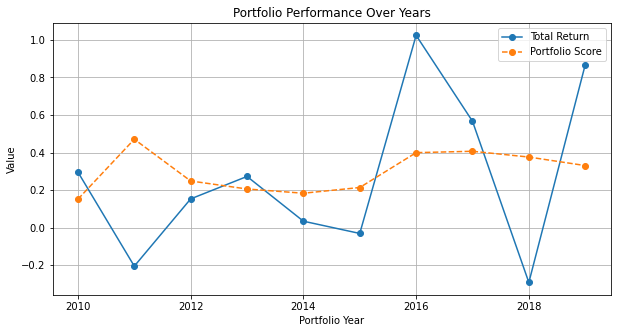

In [29]:
# Draw a figure of them.
x = portfolio_analysis['portfolio_year']  
y1 = portfolio_analysis['total_return']  
y2 = portfolio_analysis['portfolio_score']  
    
plt.figure(figsize=(10, 5))
  
plt.plot(x, y1, label='Total Return', marker='o')  # 'o': drawing a circle on each data point 
 
plt.plot(x, y2, label='Portfolio Score', marker='o', linestyle='--')  # '--': a dashed line 
  
plt.legend()  
  
plt.xlabel('Portfolio Year')  
plt.ylabel('Value')  
   
plt.title('Portfolio Performance Over Years')  
    
plt.grid(True)  
  
plt.show()

In [30]:
# Extract the 'total_return' column
total_return = portfolio_analysis['total_return']  
  
# Check if the mean of 'total_return' is significantly different from 0
t_stat, p_value = stats.ttest_1samp(total_return, popmean=0)  
print(f"Total Return t-statistic: {t_stat}, p-value: {p_value}")  

Total Return t-statistic: 1.945140997689706, p-value: 0.08361653876632695
